In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#import data
CVX = pd.read_csv(r"C:\Users\sclark\OneDrive - Navigant Consulting Inc\Documents\UMD Data Science\Principals of Data Science\Final Project\Data\Energy Stocks\CVX.csv")
XOM = pd.read_csv(r"C:\Users\sclark\OneDrive - Navigant Consulting Inc\Documents\UMD Data Science\Principals of Data Science\Final Project\Data\Energy Stocks\XOM.csv")
KMI = pd.read_csv(r"C:\Users\sclark\OneDrive - Navigant Consulting Inc\Documents\UMD Data Science\Principals of Data Science\Final Project\Data\Energy Stocks\KMI.csv")
WMB = pd.read_csv(r"C:\Users\sclark\OneDrive - Navigant Consulting Inc\Documents\UMD Data Science\Principals of Data Science\Final Project\Data\Energy Stocks\WMB.csv")
LNG = pd.read_csv(r"C:\Users\sclark\OneDrive - Navigant Consulting Inc\Documents\UMD Data Science\Principals of Data Science\Final Project\Data\Energy Stocks\LNG.csv")

In [4]:
#import Covid data
covid_raw = pd.read_csv(r"C:\Users\sclark\OneDrive - Navigant Consulting Inc\Documents\UMD Data Science\Principals of Data Science\Final Project\Data\COVID\United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
covid_raw.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [16]:
#cleaning COVID data
#pulling variables that I need
#dropping state for now so I can get a view of the country as a whole. Maybe one-hot encode
#the state variable later to add into the decision tree
variables = ["submission_date", "tot_cases", "new_case", "tot_death", "new_death"]
dropped_covid = covid_raw.loc[:,variables]
dropped_covid.head()

,submission_date,tot_cases,new_case,tot_death,new_death
0,01/22/2020,0,0,0,0
1,01/23/2020,0,0,0,0
2,01/24/2020,0,0,0,0
3,01/25/2020,0,0,0,0
4,01/26/2020,0,0,0,0


In [26]:
#converting datetime and grouping weekly and by state
dropped_covid["submission_date"]=pd.to_datetime(dropped_covid["submission_date"])
dropped_covid.rename(columns={"submission_date":"Date"}, inplace=True)
dropped_covid.dtypes
dropped_covid.head()


,Date,tot_cases,new_case,tot_death,new_death
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [27]:
#grouping boy week and state
weekly_covid = dropped_covid.groupby(pd.Grouper(key = "Date", freq ="W")).sum()
weekly_covid.reset_index(inplace=True)
weekly_covid.head()


,Date,tot_cases,new_case,tot_death,new_death
0,2020-01-26,11,5,0,0
1,2020-02-02,43,3,0,0
2,2020-02-09,77,3,0,0
3,2020-02-16,87,2,0,0
4,2020-02-23,97,2,0,0


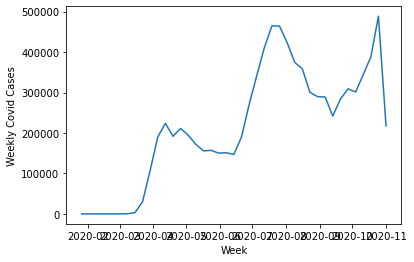

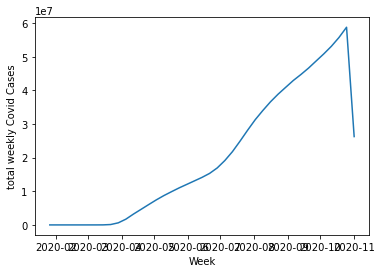

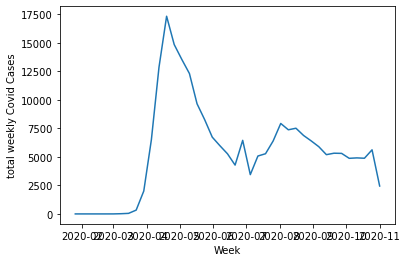

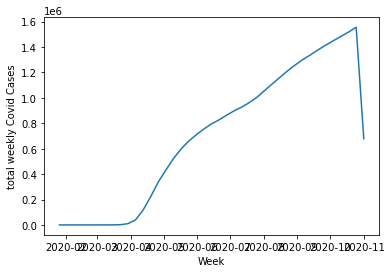

In [28]:
#Covid cases weekly
plt.figure(1)
plt.xlabel("Week")
plt.ylabel("Weekly Covid Cases")
x = weekly_covid["Date"]
y = weekly_covid["new_case"]
plt.plot(x, y, label = "covid cases weekly")

#Covid total cases weekly
plt.figure(2)
plt.xlabel("Week")
plt.ylabel("total weekly Covid Cases")
x = weekly_covid["Date"]
y = weekly_covid["tot_cases"]
plt.plot(x, y, label = "total covid cases weekly")

#Covid deats weekly
plt.figure(3)
plt.xlabel("Week")
plt.ylabel("total weekly Covid Cases")
x = weekly_covid["Date"]
y = weekly_covid["new_death"]
plt.plot(x, y, label = "covid deaths weekly")

#Covid total deaths weekly
plt.figure(4)
plt.xlabel("Week")
plt.ylabel("total weekly Covid Cases")
x = weekly_covid["Date"]
y = weekly_covid["tot_death"]
plt.plot(x, y, label = "covid total deaths weekly")


In [29]:
#cleaning stock data and grouping weekly
CVX["Date"] = pd.to_datetime(CVX["Date"])
weekly_cvx = CVX.groupby([pd.Grouper(key="Date", freq="W")]).mean()
weekly_cvx.reset_index(inplace=True)
weekly_cvx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-03,116.875000,117.557501,115.637499,116.709999,110.983223,6025350.0
1,2019-11-10,120.500001,121.931999,119.604001,121.246001,115.296652,6623020.0
2,2019-11-17,121.003999,122.036001,120.474002,121.329999,115.602605,4784640.0
3,2019-11-24,118.280001,119.106000,117.228000,117.947998,113.265640,6021820.0
4,2019-12-01,118.009998,118.552500,117.420000,117.842499,113.164331,6205050.0


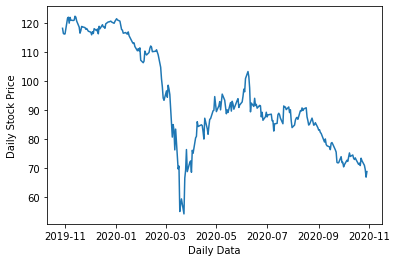

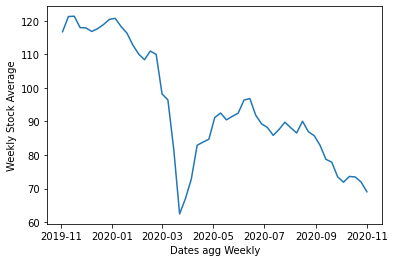

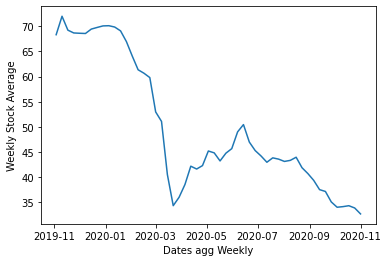

In [143]:
#plot Raw Data
plt.figure(2)
plt.xlabel("Daily Data")
plt.ylabel("Daily Stock Price")
x = CVX["Date"]
y = CVX["Close"]
plt.plot(x, y, label = "CVX Daily Data")

#plot the new group
plt.figure(1)
plt.xlabel("Dates agg Weekly")
plt.ylabel("Weekly Stock Average")
x = weekly_cvx["Date"]
y = weekly_cvx["Close"]
plt.plot(x, y, label = "CVX Weekly Data")

plt.figure(3)
plt.xlabel("Dates agg Weekly")
plt.ylabel("Weekly Stock Average")
x = weekly_xom["Date"]
y = weekly_xom["Close"]
plt.plot(x, y, label = "XOM Weekly Data")

In [31]:
#adding in "Rise" or "Fall" category
weekly_cvx["diff"] = weekly_cvx["Open"] - weekly_cvx["Close"]
weekly_cvx["Rise/Fall"] = np.where(weekly_cvx["diff"] > 0, "Rise", "Fall")
weekly_cvx.head()

,Date,Open,High,Low,Close,Adj Close,Volume,diff,Rise/Fall
0,2019-11-03,116.875000,117.557501,115.637499,116.709999,110.983223,6025350.0,0.165001,Rise
1,2019-11-10,120.500001,121.931999,119.604001,121.246001,115.296652,6623020.0,-0.745999,Fall
2,2019-11-17,121.003999,122.036001,120.474002,121.329999,115.602605,4784640.0,-0.326000,Fall
3,2019-11-24,118.280001,119.106000,117.228000,117.947998,113.265640,6021820.0,0.332003,Rise
4,2019-12-01,118.009998,118.552500,117.420000,117.842499,113.164331,6205050.0,0.167499,Rise


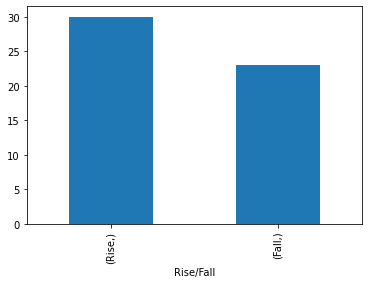

In [32]:
#Chart of Rise/fall
ax = weekly_cvx[["Rise/Fall"]].value_counts().plot(kind = "bar")


In [133]:
merged = pd.merge(weekly_cvx, weekly_covid, on=["Date"])
#merged.drop(["Open", "High", "Low", "Close", "Adj Close", "Volume", "diff"], axis=1, inplace=True)
merged.head()

,Date,Open,High,Low,Close,Adj Close,Volume,diff,Rise/Fall,tot_cases,new_case,tot_death,new_death
0,2020-01-26,113.347500,113.787501,112.207498,112.789999,108.312406,7247000.0,0.557501,Rise,11,5,0,0
1,2020-02-02,110.459999,111.174001,109.278000,110.084001,105.713832,8047360.0,0.375998,Rise,43,3,0,0
2,2020-02-09,108.491998,109.270000,107.538001,108.367999,104.065950,7342940.0,0.123999,Rise,77,3,0,0
3,2020-02-16,110.808000,111.414001,110.160001,110.956001,106.798324,5790160.0,-0.148001,Fall,87,2,0,0
4,2020-02-23,109.822498,110.407499,109.017500,109.949999,106.819225,5443450.0,-0.127500,Fall,97,2,0,0


In [134]:
#dropped date because i was getting an error
    #found out that date needs to be converted to categorical data to work
    #in the tree
Y = merged["Rise/Fall"]
features = ["Open", "tot_cases","new_case", "tot_death", "new_death"]
X = merged.loc[:,features]

In [135]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, Y)

In [136]:
#get sorted labels for plot 
import numpy as np
sorted = Y.unique()
sorted = np.sort(sorted)
sorted = list(map(str, sorted))
sorted

['Fall', 'Rise']

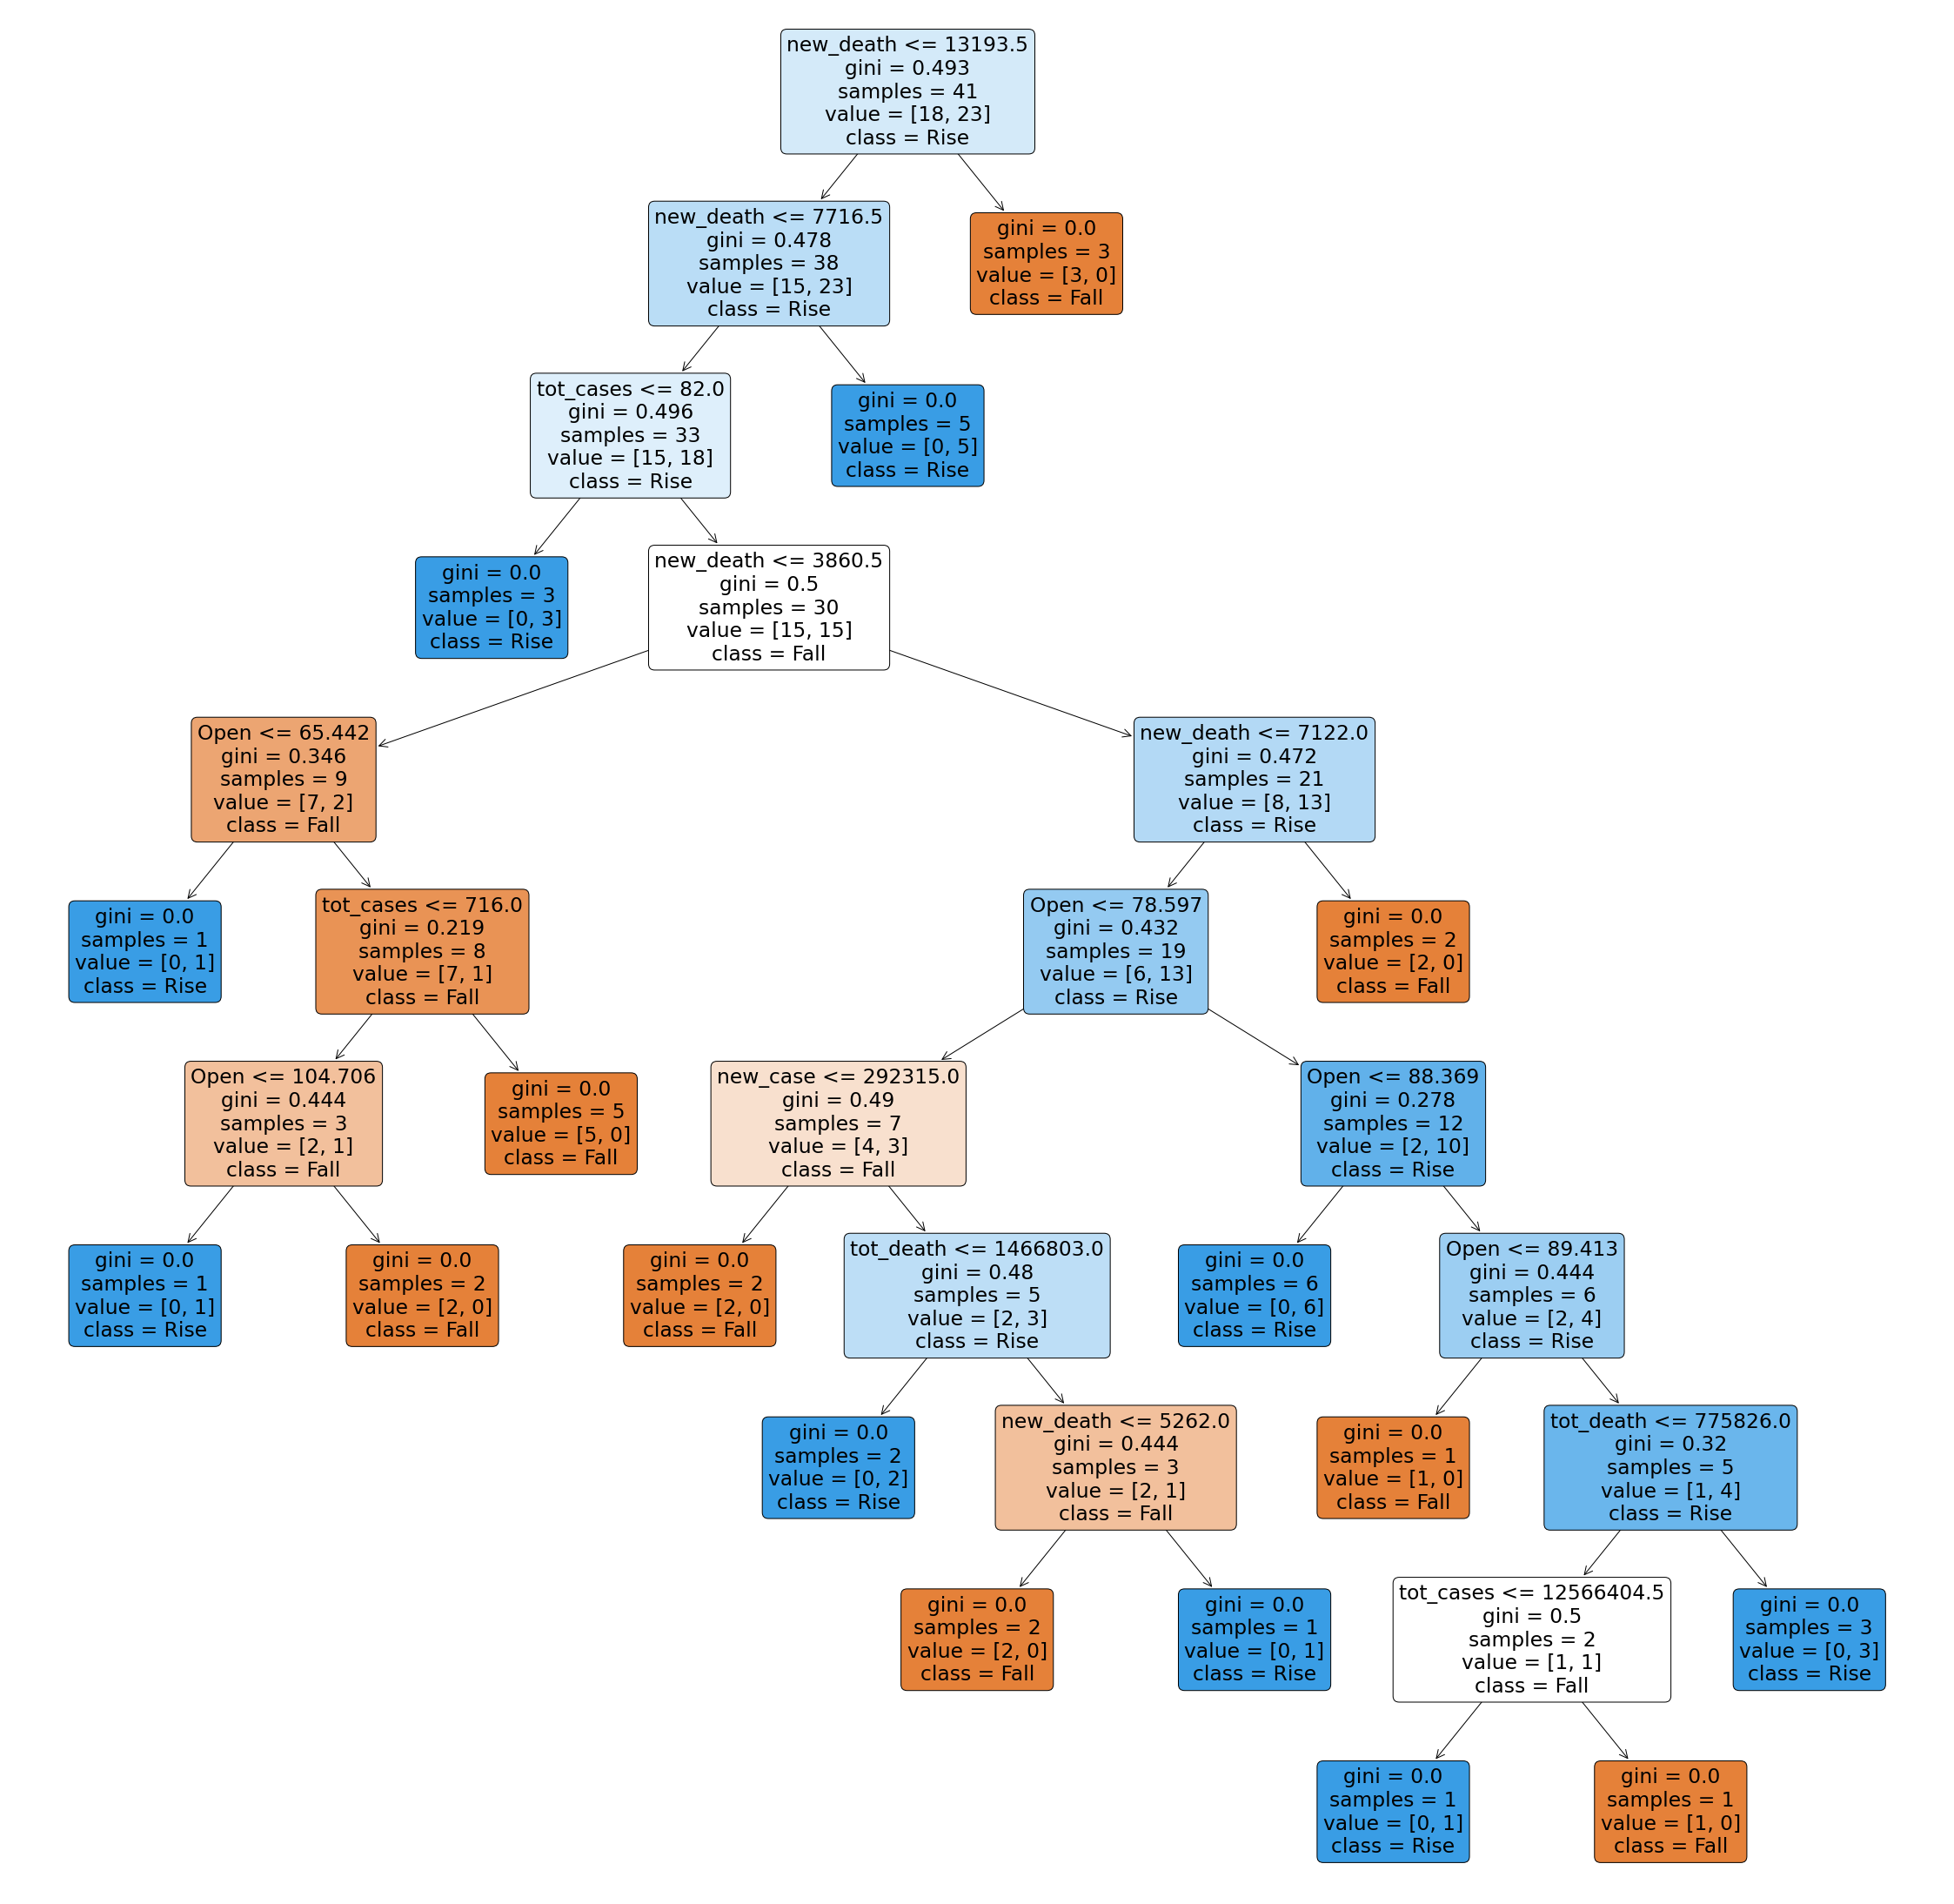

In [137]:
plt.subplots(figsize=(40, 40))
x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted,feature_names=features) 


In [138]:
#cleaning test data
XOM["Date"] = pd.to_datetime(XOM["Date"])
weekly_xom = XOM.groupby([pd.Grouper(key="Date", freq="W")]).mean()
weekly_xom.reset_index(inplace=True)
weekly_xom["diff"] = weekly_cvx["Open"] - weekly_cvx["Close"]
weekly_xom["Rise/Fall"] = np.where(weekly_cvx["diff"] > 0, "Rise", "Fall")
#merge covid data
mergedTest = pd.merge(weekly_xom, weekly_covid, on=["Date"])
mergedTest.head()

,Date,Open,High,Low,Close,Adj Close,Volume,diff,Rise/Fall,tot_cases,new_case,tot_death,new_death
0,2020-01-26,67.297499,67.432499,66.650002,66.965000,63.508648,18215050,0.557501,Rise,11,5,0,0
1,2020-02-02,64.508000,64.827999,63.703999,64.082000,60.774454,21585220,0.375998,Rise,43,3,0,0
2,2020-02-09,61.584000,62.185999,60.739999,61.356001,58.189156,24517300,0.123999,Rise,77,3,0,0
3,2020-02-16,60.922001,61.103999,60.238000,60.668000,58.362689,16302000,-0.148001,Fall,87,2,0,0
4,2020-02-23,60.000000,60.264999,59.447501,59.802501,57.530077,16721575,-0.127500,Fall,97,2,0,0


In [139]:
#setting up features
XTest = mergedTest.loc[:, features]
XTest

,Open,tot_cases,new_case,tot_death,new_death
0,67.297499,11,5,0,0
1,64.508000,43,3,0,0
2,61.584000,77,3,0,0
3,60.922001,87,2,0,0
4,60.000000,97,2,0,0
5,53.879999,131,15,2,1
6,51.606000,1301,392,84,18
7,42.035999,12029,3049,296,48
8,34.546000,113644,29933,1503,333
9,35.617999,619465,107500,9706,2005


In [140]:
YTest = mergedTest["Rise/Fall"]
YTest

0     Rise
1     Rise
2     Rise
3     Fall
4     Fall
5     Rise
6     Fall
7     Fall
8     Rise
9     Fall
10    Fall
11    Rise
12    Fall
13    Fall
14    Fall
15    Rise
16    Rise
17    Rise
18    Rise
19    Fall
20    Rise
21    Rise
22    Rise
23    Fall
24    Rise
25    Rise
26    Fall
27    Rise
28    Fall
29    Fall
30    Rise
31    Rise
32    Rise
33    Rise
34    Fall
35    Rise
36    Rise
37    Fall
38    Fall
39    Rise
40    Fall
Name: Rise/Fall, dtype: object

In [141]:
YPredicted = clf.predict(XTest)
YPredicted

array(['Rise', 'Rise', 'Rise', 'Rise', 'Rise', 'Rise', 'Rise', 'Rise',
       'Rise', 'Rise', 'Fall', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise',
       'Rise', 'Rise', 'Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Rise',
       'Rise', 'Rise', 'Rise', 'Rise', 'Fall', 'Fall', 'Rise', 'Fall',
       'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Fall', 'Fall', 'Rise',
       'Rise'], dtype=object)

In [142]:
from sklearn import metrics
accuracy = metrics.accuracy_score(YTest, YPredicted)
accuracy

0.6341463414634146